In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('financial_source.xlsx',sheet_name='Quarter Source')
df_margin = pd.read_excel('financial_source.xlsx',sheet_name='Quarter Margins')

In [3]:
df_margin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Year                                 18 non-null     datetime64[ns]
 1   ByYear                               18 non-null     int64         
 2   GP Margin                            18 non-null     float64       
 3   OP Margin                            18 non-null     float64       
 4   PT Margin                            18 non-null     float64       
 5   NP Margin                            18 non-null     float64       
 6   总资产周转率 Total Assets Turnover         18 non-null     float64       
 7   应收账款周转天数 Days Sales Outstanding      18 non-null     float64       
 8   应付账款周转天数 Days Payables Outstanding   18 non-null     float64       
 9   存货周转天数 Days Inventories Outstanding  18 non-null     float64       
 10  现金转换周期 Cash Conv

In [4]:
df_merged = df.merge(df_margin,on='Year')
df_merged['year_quater'] = df_merged['Year'].dt.year.astype(str) + ',Q' + df_merged['Year'].dt.quarter.astype(str)
df_merged.set_index('year_quater',inplace=True)
df_merged.head()

,Year,Revenue,Gross Profit,Operating Profit,Profit Before Tax,Net Profit,Cost of Sales,Total Assets,Total Liabilities,Total ShareHolder's Equity,...,应付账款周转天数 Days Payables Outstanding,存货周转天数 Days Inventories Outstanding,现金转换周期 Cash Conversion Cycle,流動比率 Current Ratio,速動比率 Quick Ratio,股本乘数 Equity Multiplier,债务股本比 Debt-to-Equity Ratio,負債比率 Debt Ratio,ROE,ROA
year_quater,,,,,,,,,,,,,,,,,,,,,
"2020,Q1",2020-03-31,121741,98712,68712,58822,58418,23029,1121264,361901,759363,...,2529.359706,46.724565,3449.942379,2.221524,1.432002,1.476585,0.476585,0.322762,0.076930,0.052100
"2020,Q2",2020-06-30,124336,95324,73303,64017,63150,29012,1223300,405978,817322,...,2164.484686,64.660054,3129.460558,1.315788,0.742065,1.496717,0.496717,0.331871,0.077265,0.051623
"2020,Q3",2020-09-30,136096,107165,78604,72490,70056,28931,1290229,403951,886278,...,2888.526747,93.334831,3669.429416,1.904304,1.055272,1.455784,0.455784,0.313085,0.079045,0.054297
"2020,Q4",2020-12-31,149889,106197,88424,76988,75053,43692,1415428,273104,1142324,...,1389.756917,55.227845,2093.043675,3.634894,2.925925,1.239078,0.239078,0.192948,0.065702,0.053025
"2021,Q1",2021-03-31,171464,99604,89506,77087,76472,71860,1573268,363934,1209334,...,786.031240,22.143299,1458.175924,2.785196,1.974606,1.300938,0.300938,0.231324,0.063235,0.048607


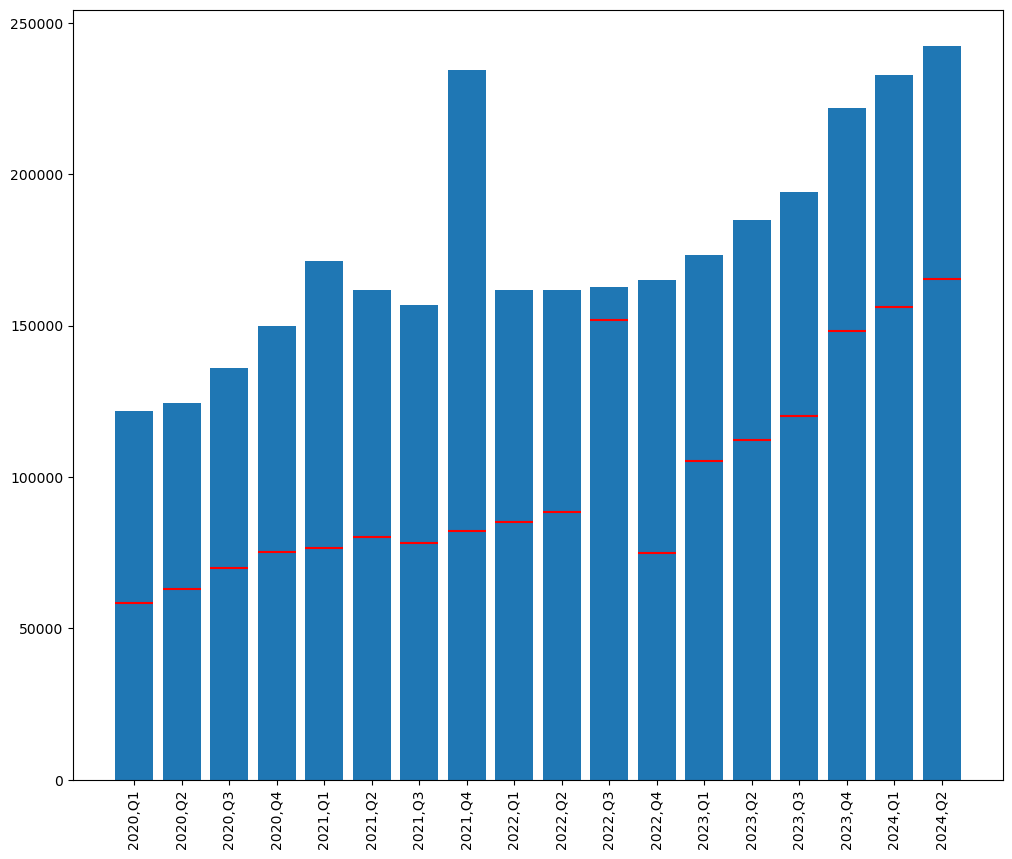

In [7]:
plt.figure(figsize=(12, 10))

plt.bar(df_merged.index,df_merged['Revenue'])
plt.xticks(rotation=90, ha='center') 

for i in range(len(df_merged)):
    plt.hlines(
        y=df_merged['Net Profit'].iloc[i], 
        xmin=i - 0.4, 
        xmax=i + 0.4, 
        color='red')

plt.show()

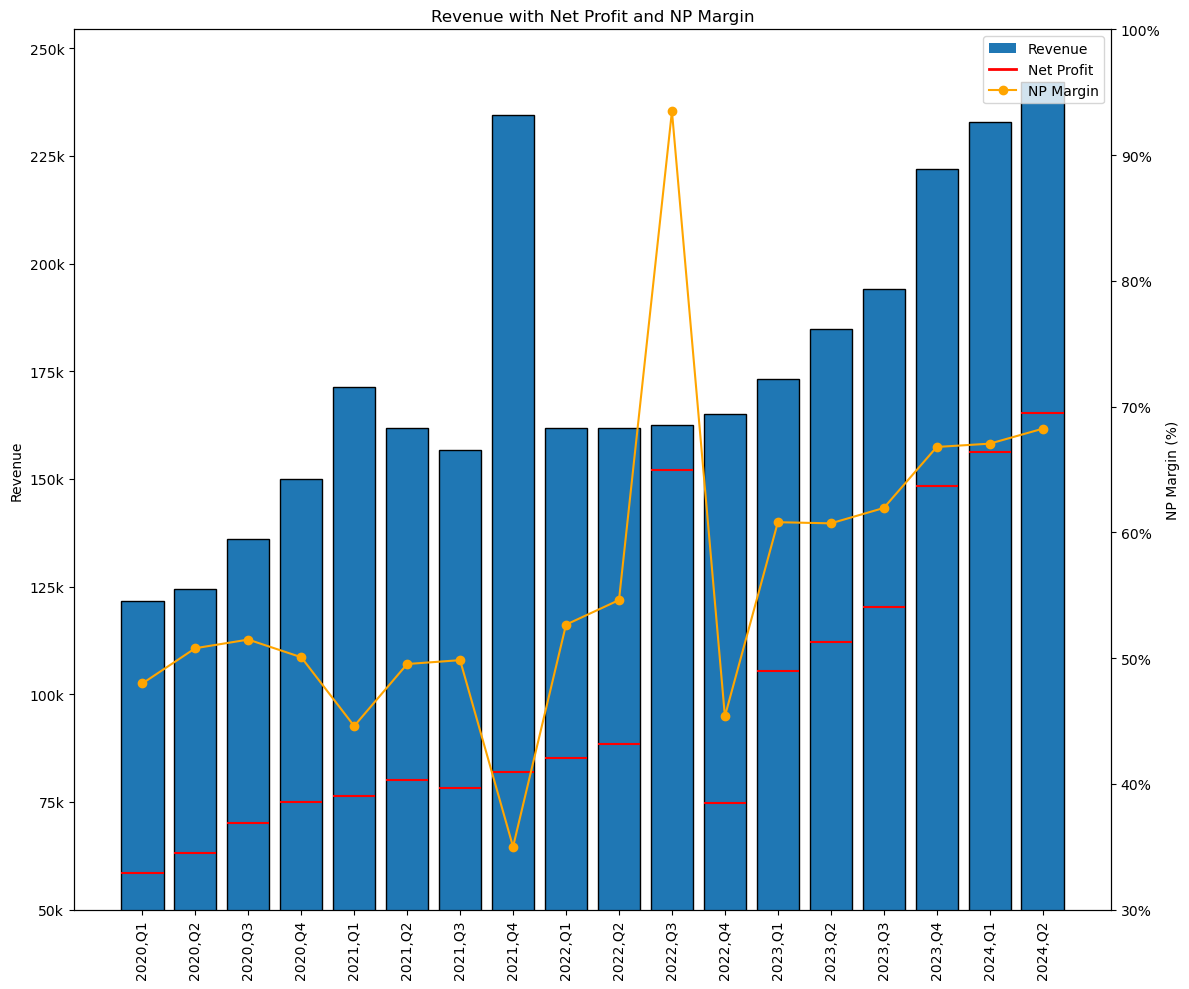

In [10]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

fig, ax1 = plt.subplots(figsize=(12, 10))

# Plot the Revenue as bars on the first y-axis
bars = ax1.bar(df_merged.index, df_merged['Revenue'], label='Revenue',edgecolor='black')
ax1.set_ylabel("Revenue")
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x/1000:.0f}k'))

for i in range(len(df_merged)):
    plt.hlines(
        y=df_merged['Net Profit'].iloc[i],  
        xmin=i - 0.4, 
        xmax=i + 0.4, 
        color='red')
    
ax2 = ax1.twinx()
line_np_margin = ax2.plot(df_merged.index, df_merged['NP Margin'], color='orange', marker='o', label='NP Margin')
ax2.set_ylabel('NP Margin (%)')

# ax2.set_yticklabels([f'{int(tick * 100)}%' for tick in ax2.get_yticks()])
yticks = ax2.get_yticks()
ax2.set_yticks(yticks)
ax2.set_yticklabels([f'{int(tick * 100)}%' for tick in yticks])

ax1.set_xticks(df_merged.index)
ax1.set_xticklabels(df_merged.index, rotation=90, ha='center')
ax1.set_ylim(50000)

line_np = Line2D([0], [0], color='red', label='Net Profit', linestyle='-', linewidth=2)

# bar_legend = bars[0]  # Get a bar to represent Revenue in the legend
bar_legend = Patch(label='Revenue')
# Add legends for both y-axes
# fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
fig.legend(handles=[bar_legend, line_np, line_np_margin[0]], loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Set a title
plt.title('Revenue with Net Profit and NP Margin')

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent label overlap
plt.show()